In [ ]:
#pip install nibabel

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#carrega a imagem a ser aberta
img_name=input("Digite a imagem a ser aberta: ")
img ='/content/drive/MyDrive/MRI/Task01_BrainTumour/imagesTr/' + img_name + '.nii.gz'
imagem = nib.load(img)

Digite a imagem a ser aberta: BRATS_001


In [ ]:
#abre o cabeçalho das imagens
imagem.shape
header=imagem.get_header()
print(header)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 240 240 155   4   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [1. 0. 0. 0.]
srow_y     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  This is separate from the ipykernel package so we can avoid doing imports until


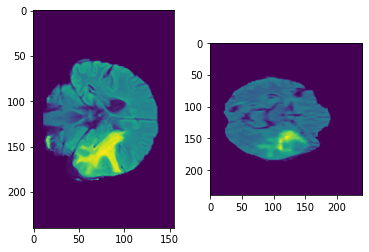

In [ ]:
#mostra camadas 2 e 3
data = imagem.get_fdata()
data.shape

fig, axes = plt.subplots(ncols=2)


axes[0].imshow(data[: ,90,:,0])
axes[1].imshow(data[: ,:,60,0])


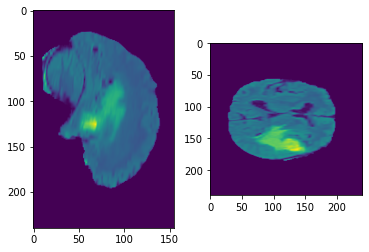

In [ ]:
#mostra camada 1 e 3 com diferentes profudidades
fig, axes = plt.subplots(ncols=2)

axes[0].imshow(data[140 ,:,:,0])
axes[1].imshow(data[: ,:,80,0])

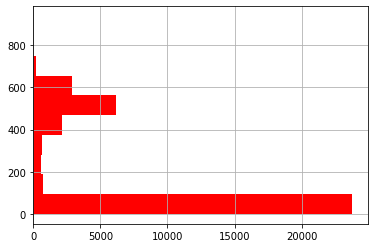

In [ ]:
plt.hist(data[100 ,:,:,0].ravel(),bins=10,color='Red',orientation='horizontal')
plt.grid(data[100,:,:,0].ravel(),visible='None',which='major', axis='both')
#representa voxels da primeira dimensão

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


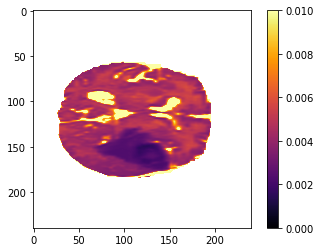

In [ ]:
#plota novos dados com variações matemáticas entre as matrizes
new_data = 2.5/data
plt.imshow(new_data[:,:,77,0],vmin=0,vmax=0.01,cmap='inferno')
plt.colorbar()

In [ ]:
#define novo arquivo com a nova imagem e salva nfti
novo_nome=input("Digite um nome para o novo arquivo: ")
nib.Nifti1Image(new_data,affine=imagem.affine).to_filename(novo_nome+'.nii.gz')

Digite um nome para o novo arquivo: 1


In [ ]:
#carrega labels
labels= '/content/drive/MyDrive/MRI/Task01_BrainTumour/labelsTr/'+img_name+'.nii.gz'
img_label=nib.load(labels)
img_labels=img_label.get_fdata()


In [ ]:
#transforma imagem em array para visualização, motra seu tipo. data = imagem.get_fdata()=image_data
imagem_array = np.array(imagem.dataobj)
print(f'tipo de imagem{type(imagem_array)}.')
imagem


tipo de imagem<class 'numpy.ndarray'>.


In [ ]:
#medidas da imagem e print
#channels para cérebro
height, width, depth,channels = data.shape
print(f' A imagem tem as seguintes dimensões:\naltura={height}\nlargura={width}\nprofundidade={depth}\ncanais={channels}')

 A imagem tem as seguintes dimensões:
altura=240
largura=240
profundidade=155
canais=4


In [ ]:
#seleciona todas as camadas e plota
val = 154
i=np.random.randint(0,val)
#escolhe canal
#channel canais = channel
channel = 0
print(f"Plot de camadas {i}, largura = {width}, canais = {channels}")
plt.imshow(data[ :, i,channel ], cmap = 'Greys_r')
plt.axis('off')
plt.show()

Plot de camadas 140, largura = 240, canais = 4


In [ ]:
!pip install itk
!pip install itkwidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.6 MB 8.6 kB/s 
     |████████████████████████████████| 95.3 MB 41 kB/s 
     |████████████████████████████████| 20.3 MB 1.4 MB/s 
     |████████████████████████████████| 15.0 MB 16.0 MB/s 
     |████████████████████████████████| 54.5 MB 22 kB/s 
     |████████████████████████████████| 16.6 MB 20.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 5.1 MB/s 
     |████████████████████████████████| 2.5 MB 44.5 MB/s 
     |████████████████████████████████| 508 kB 55.5 MB/s 
     |████████████████████████████████| 271 kB 49.4 MB/s 
     |████████████████████████████████| 1.1 MB 55.9 MB/s 
     |████████████████████████████████| 11.2 MB 28.7 MB/s 
     |████████████████████████████████| 862 kB 38.0 MB/s 
     |████████████████████████████████| 930 kB 4

In [ ]:
#importa ferramentas para interação
import itk
import itkwidgets
from ipywidgets import interact

In [ ]:
def explore_3dimage(layer):
  plt.figure(figsize=(10,15))
  channel = 3
  plt.imshow(data[:, :, layer,channel],cmap='icefire');
  plt.title('Explora Camadas', fontsize=20)
  plt.axis('off')
  plt.colorbar()
  return layer
    
# usa a função interact do itkwidgets para explorar camadas, are mais escura é o tumor
interact(explore_3dimage, layer=(0, data.shape[2] - 1));

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

In [ ]:
#cria classe do scikite learn para mover pontos aos valores do tumor
from matplotlib.colors import Normalize


class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [ ]:
#cria uma média das imagens em 2d para treino e teste
media_2d=np.mean(data,axis=2)
X=media_2d[:,0]
y=media_2d[0,:]
